In [2]:
using Plots 
using LinearAlgebra 
using LaTeXStrings 
using ITensors 
using ITensorMPS 
ITensors.disable_warn_order()

In [3]:
R = 10
N = 2^R
;

#### 素朴な方法

In [5]:
#X = range(-2, 2, length = N)
X = range(-3, 5, length = N)
fdata = [f(x) for x in X]
fdata_plot = [f(x) for x in X]
;

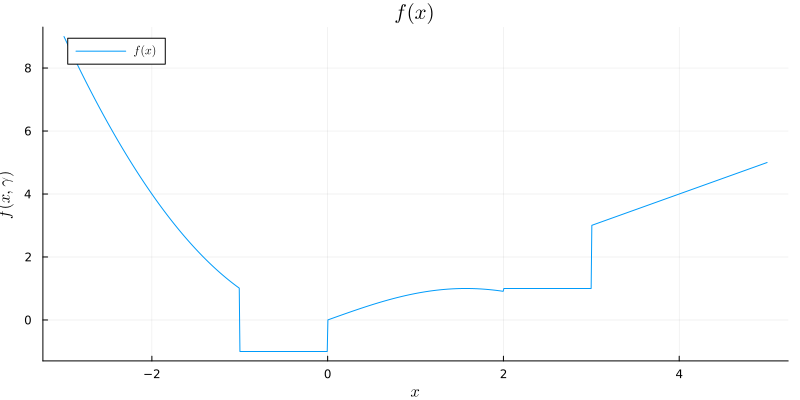

In [6]:
plot(X, fdata, label = L"f(x)", xlabel = L"x", ylabel = L"f(x, \gamma)", title = L"f(x)", legend = :topleft, size = (800, 400))

In [7]:
savefig("f.png")

"/Users/sakurairihito/Documents/Research/post-doc/Tensor_FixedSeedMC/notebook/multi-asset/Europian_min_op/random_corr/all_gr100/f.png"

#### スケール分解

In [8]:
sitesx = [Index(2, "Qubit,x=$i") for i in 1:R]
Tensor = ITensor(fdata, vcat(reverse(sitesx)))
;

In [9]:
#足の並べ方をランダムに配置してMPSを構成
using Random
cutoff = 1e-20
sitesx_ = [Index(2, "Qubit,x=$i") for i in 1:R]
shuffle!(sitesx_)
@show sitesx_
Tensor_ = ITensor(fdata, vcat(reverse(sitesx_)))
;

M = MPS(Tensor_, vcat(sitesx_))
M1 = MPS(Tensor_, vcat(sitesx_); cutoff=cutoff)
;
@show M1

sitesx_ = Index{Int64}[(dim=2|id=855|"Qubit,x=3"), (dim=2|id=824|"Qubit,x=9"), (dim=2|id=481|"Qubit,x=4"), (dim=2|id=826|"Qubit,x=5"), (dim=2|id=893|"Qubit,x=8"), (dim=2|id=915|"Qubit,x=2"), (dim=2|id=722|"Qubit,x=10"), (dim=2|id=539|"Qubit,x=6"), (dim=2|id=644|"Qubit,x=7"), (dim=2|id=101|"Qubit,x=1")]
M1 = MPS
[1] ((dim=2|id=855|"Qubit,x=3"), (dim=2|id=55|"Link,l=1"))
[2] ((dim=2|id=55|"Link,l=1"), (dim=2|id=824|"Qubit,x=9"), (dim=4|id=320|"Link,l=2"))
[3] ((dim=4|id=320|"Link,l=2"), (dim=2|id=481|"Qubit,x=4"), (dim=5|id=39|"Link,l=3"))
[4] ((dim=5|id=39|"Link,l=3"), (dim=2|id=826|"Qubit,x=5"), (dim=5|id=694|"Link,l=4"))
[5] ((dim=5|id=694|"Link,l=4"), (dim=2|id=893|"Qubit,x=8"), (dim=5|id=705|"Link,l=5"))
[6] ((dim=5|id=705|"Link,l=5"), (dim=2|id=915|"Qubit,x=2"), (dim=5|id=894|"Link,l=6"))
[7] ((dim=5|id=894|"Link,l=6"), (dim=2|id=722|"Qubit,x=10"), (dim=5|id=676|"Link,l=7"))
[8] ((dim=5|id=676|"Link,l=7"), (dim=2|id=539|"Qubit,x=6"), (dim=4|id=279|"Link,l=8"))
[9] ((dim=4|id=279|"L

MPS
[1] ((dim=2|id=855|"Qubit,x=3"), (dim=2|id=55|"Link,l=1"))
[2] ((dim=2|id=55|"Link,l=1"), (dim=2|id=824|"Qubit,x=9"), (dim=4|id=320|"Link,l=2"))
[3] ((dim=4|id=320|"Link,l=2"), (dim=2|id=481|"Qubit,x=4"), (dim=5|id=39|"Link,l=3"))
[4] ((dim=5|id=39|"Link,l=3"), (dim=2|id=826|"Qubit,x=5"), (dim=5|id=694|"Link,l=4"))
[5] ((dim=5|id=694|"Link,l=4"), (dim=2|id=893|"Qubit,x=8"), (dim=5|id=705|"Link,l=5"))
[6] ((dim=5|id=705|"Link,l=5"), (dim=2|id=915|"Qubit,x=2"), (dim=5|id=894|"Link,l=6"))
[7] ((dim=5|id=894|"Link,l=6"), (dim=2|id=722|"Qubit,x=10"), (dim=5|id=676|"Link,l=7"))
[8] ((dim=5|id=676|"Link,l=7"), (dim=2|id=539|"Qubit,x=6"), (dim=4|id=279|"Link,l=8"))
[9] ((dim=4|id=279|"Link,l=8"), (dim=2|id=644|"Qubit,x=7"), (dim=2|id=354|"Link,l=9"))
[10] ((dim=2|id=354|"Link,l=9"), (dim=2|id=101|"Qubit,x=1"))


In [10]:
#スケール分離してMPSを構成
sites = Index{Int64}[]
for i in 1:R
    push!(sites, sitesx[i])
end

M2 = MPS(Tensor, sites; cutoff=cutoff)
;

In [11]:
@show M2

M2 = MPS
[1] ((dim=2|id=339|"Qubit,x=1"), (dim=2|id=15|"Link,l=1"))
[2] ((dim=2|id=15|"Link,l=1"), (dim=2|id=146|"Qubit,x=2"), (dim=4|id=70|"Link,l=2"))
[3] ((dim=4|id=70|"Link,l=2"), (dim=2|id=673|"Qubit,x=3"), (dim=5|id=173|"Link,l=3"))
[4] ((dim=5|id=173|"Link,l=3"), (dim=2|id=850|"Qubit,x=4"), (dim=5|id=56|"Link,l=4"))
[5] ((dim=5|id=56|"Link,l=4"), (dim=2|id=243|"Qubit,x=5"), (dim=5|id=102|"Link,l=5"))
[6] ((dim=5|id=102|"Link,l=5"), (dim=2|id=791|"Qubit,x=6"), (dim=5|id=541|"Link,l=6"))
[7] ((dim=5|id=541|"Link,l=6"), (dim=2|id=643|"Qubit,x=7"), (dim=5|id=838|"Link,l=7"))
[8] ((dim=5|id=838|"Link,l=7"), (dim=2|id=883|"Qubit,x=8"), (dim=4|id=21|"Link,l=8"))
[9] ((dim=4|id=21|"Link,l=8"), (dim=2|id=372|"Qubit,x=9"), (dim=2|id=497|"Link,l=9"))
[10] ((dim=2|id=497|"Link,l=9"), (dim=2|id=878|"Qubit,x=10"))



MPS
[1] ((dim=2|id=339|"Qubit,x=1"), (dim=2|id=15|"Link,l=1"))
[2] ((dim=2|id=15|"Link,l=1"), (dim=2|id=146|"Qubit,x=2"), (dim=4|id=70|"Link,l=2"))
[3] ((dim=4|id=70|"Link,l=2"), (dim=2|id=673|"Qubit,x=3"), (dim=5|id=173|"Link,l=3"))
[4] ((dim=5|id=173|"Link,l=3"), (dim=2|id=850|"Qubit,x=4"), (dim=5|id=56|"Link,l=4"))
[5] ((dim=5|id=56|"Link,l=4"), (dim=2|id=243|"Qubit,x=5"), (dim=5|id=102|"Link,l=5"))
[6] ((dim=5|id=102|"Link,l=5"), (dim=2|id=791|"Qubit,x=6"), (dim=5|id=541|"Link,l=6"))
[7] ((dim=5|id=541|"Link,l=6"), (dim=2|id=643|"Qubit,x=7"), (dim=5|id=838|"Link,l=7"))
[8] ((dim=5|id=838|"Link,l=7"), (dim=2|id=883|"Qubit,x=8"), (dim=4|id=21|"Link,l=8"))
[9] ((dim=4|id=21|"Link,l=8"), (dim=2|id=372|"Qubit,x=9"), (dim=2|id=497|"Link,l=9"))
[10] ((dim=2|id=497|"Link,l=9"), (dim=2|id=878|"Qubit,x=10"))


BondDim = Plot{Plots.GRBackend() n=3}


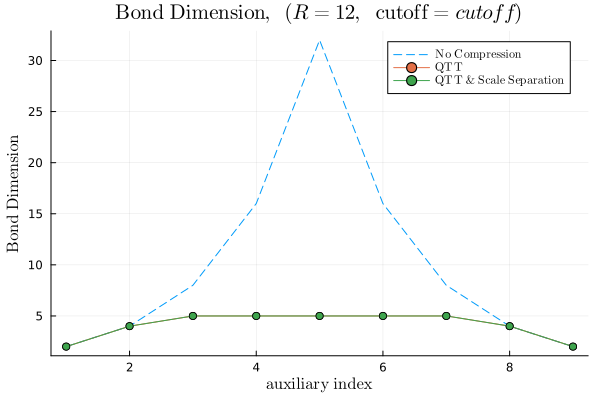

In [12]:
#ボンド次元をプロットする

BondDim = plot(#yscale = :log,
                title = L"\mathrm{Bond~Dimension},~~ (R = 12, ~~\mathrm{cutoff}={cutoff})",
                xlabel = L"\mathrm{auxiliary~index}",
                ylabel = L"\mathrm{Bond~Dimension}")

plot!(BondDim, linkdims(M),
        linestyle = :dash,
        label = L"\mathrm{No~Compression}")

plot!(BondDim, linkdims(M1),
        markershape = :circle,
        label = L"\mathrm{QTT}")

plot!(BondDim, linkdims(M2),
        markershape = :circle,
        label = L"\mathrm{QTT~&~Scale~Separation}")
savefig("BondDim_spectol.pdf")
@show BondDim

In [13]:
savefig("BondDim_spectol.png")

"/Users/sakurairihito/Documents/Research/post-doc/Tensor_FixedSeedMC/notebook/multi-asset/Europian_min_op/random_corr/all_gr100/BondDim_spectol.png"

In [14]:
M2_reconst = Array(reduce(*, M2), vcat(reverse(sitesx)));

In [15]:
M2_reconst = reshape(M2_reconst, 2^R);

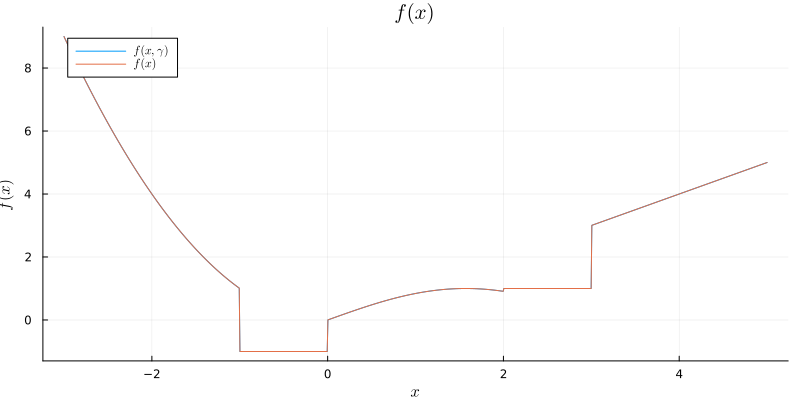

In [16]:
p = plot()
plot!(p, X, fdata, label = L"f(x, \gamma)", xlabel = L"x", ylabel = L"f(x, \gamma)", title = L"f(x, \gamma) = e^{-x + \gamma}", legend = :topleft, size = (800, 400))
plot!(p, X, M2_reconst , label = L"f(x)", xlabel = L"x", ylabel = L"f(x)", title = L"f(x)", legend = :topleft, size = (800, 400))

In [17]:
savefig("reconst.png")

"/Users/sakurairihito/Documents/Research/post-doc/Tensor_FixedSeedMC/notebook/multi-asset/Europian_min_op/random_corr/all_gr100/reconst.png"

In [18]:
M2_reconst #

1024-element Vector{Float64}:
 9.000000000000092
 8.953140333426129
 8.906402975932906
 8.859787927520474
 8.813295188188825
 8.766924757937959
 8.720676636767859
 8.674550824678546
 8.628547321670009
 8.582666127742272
 ⋮
 4.937438905180845
 4.94525904203323
 4.953079178885626
 4.960899315738004
 4.968719452590391
 4.9765395894427815
 4.984359726295172
 4.9921798631475545
 4.999999999999943

In [19]:
abs.( M2_reconst .- fdata ) |> maximum |> println

1.0835776720341528e-13
